In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Importing the Data**

In [60]:
df = pd.read_csv('/content/drive/MyDrive/project/austo_automobile.csv')

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Objective

To understand how the price of a car influences customer purchasing decisions across various car segments (SUV, Sedan, Hatchback). This analysis will help the marketing team target campaigns more effectively by aligning pricing strategies with customer preferences and affordability.

Data Description

*   Age: The age of the individual in years.|
*   Gender: The gender of the individual, categorized as male or female.


*   Profession: The occupation or profession of the individual.

*   Marital_status: The marital status of the individual, such as married &, single

*  Education: The educational qualification of the individual Graduate and Post Graduate

*  No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
*Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"


*  House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"


*   Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"


*   Partner_salary: The salary or income of the individual's partner, if applicable.


*   Total_salary: The total combined salary of the individual and their partner (if applicable)
*   Price: The price of a product or service.


*   Make: The type of automobile

In [61]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV


In [62]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.000,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.000,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.000,31600,31000,Hatchback


In [63]:
print(df.shape [0], 'rows and', df.shape[1], "columns.")

1581 rows and 14 columns.


Datatype of the columns

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


*   Gender: Some entries have missing gender. This could be due to users not sharing it or data not being recorded properly.
*   Partner Salary: Many entries are missing partner salary. This might be because the partner is not working. We can check this by comparing with the "Partner_working" column





 Statistical summary for the dataset

In [65]:
df.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000,1528,1581,1581,1581,1581.000,1581,1581,1581,1581.000,1475.000,1581.000,1581.000,1581
unique,NaN,4,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1199,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922,NaN,NaN,NaN,NaN,2.458,NaN,NaN,NaN,60392.220,20225.559,79625.996,35597.723,NaN
std,8.426,NaN,NaN,NaN,NaN,0.943,NaN,NaN,NaN,14674.825,19573.149,25545.858,13633.637,NaN
min,22.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,30000.000,0.000,30000.000,18000.000,NaN
25%,25.000,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,51900.000,0.000,60500.000,25000.000,NaN
50%,29.000,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,59500.000,25600.000,78000.000,31000.000,NaN
75%,38.000,NaN,NaN,NaN,NaN,3.000,NaN,NaN,NaN,71800.000,38300.000,95900.000,47000.000,NaN




*   Most people buying cars are around 25 to 38 years old. Average age is 32, but max is 54 years. comparing difference between the average and maximum ages data present with outliers. need further analysis.
*   People usually have moderate family responsibilities (2–3 dependents max 4).
*   The majority have a monthly income around \$60,000.
*   Many partners are not working or their income is not provided.
*   Total family income mostly falls between \$60,000 to \$1,00,000.
*   Most customers prefer cars priced between \$25,000 to \$47,000.
*   Very few customers go for high-end cars above \$50,000.









In [66]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [69]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


Spotted-two incorrect entries for gender: "Femal" and "Femle".
Replacing the female typo errors

In [70]:
df['Gender'] = df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})

In [71]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [72]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,329


In [73]:
df['Gender'].isnull().sum()

np.int64(53)

In [74]:
df[df['Gender'].isnull()][['Age', 'Profession', 'Marital_status', 'Education', 'Salary']]

,Age,Profession,Marital_status,Education,Salary
24,46,Business,Married,Post Graduate,78000
25,46,Salaried,Married,Post Graduate,87900
67,53,Salaried,Married,Graduate,80900
125,47,Salaried,Single,Post Graduate,87200
203,44,Salaried,Single,Post Graduate,68600
302,41,Salaried,Married,Graduate,55900
325,40,Business,Married,Graduate,59600
463,36,Salaried,Married,Post Graduate,66600
485,35,Business,Married,Post Graduate,61600
528,34,Salaried,Single,Post Graduate,64800


In [75]:
df['Gender'] = df['Gender'].fillna('Male')

**OBSERVATION:**
There is no clear link between missing "Gender" values and other fields.
The most common gender in the dataset is Male. So, it makes sense to fill the missing Gender values with "Male". This is a simple and safe way to handle the missing data.

In [76]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [77]:
df['Partner_salary'].value_counts()

,count
Partner_salary,
0.000,623
40500.000,29
40200.000,27
40000.000,25
40100.000,25
...,...
300.000,1
22300.000,1
500.000,1


In [78]:
df[df['Partner_salary'].isnull()]['Partner_working'].value_counts()

,count
Partner_working,
No,90
Yes,16


In [79]:
# Filling missing partner_salary values
df['Partner_salary'] = df['Partner_salary'].fillna(df['Total_salary'] - df['Salary'])
# Confirm update
print("Remaining missing values in Partner_salary:", df['Partner_salary'].isnull().sum())

Remaining missing values in Partner_salary: 0


**OBSERVATIONS:** There are only 16 missing values in the "Partner_salary" column.
In these cases, the partner is working, but their salary is not given.
We can find the missing partner salary by doing:
Total Salary − Individual Salary = Partner Salary. This method will help us fill the missing values accurately.

In [80]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [81]:
df.nunique()

,0
Age,33
Gender,2
Profession,2
Marital_status,2
Education,2
No_of_Dependents,5
Personal_loan,2
House_loan,2
Partner_working,2
Salary,538


#UNIVARIATE ANALYSIS

Customer age Analysis

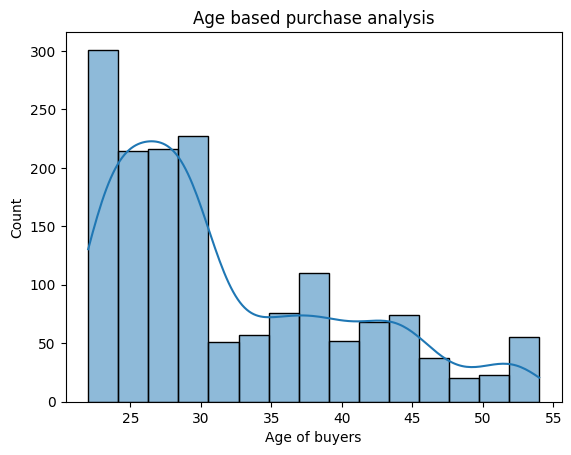

In [82]:
plt.title('Age based purchase analysis')
plt.xlabel('Age of buyers')
sns.histplot(data=df, x='Age', kde= True);

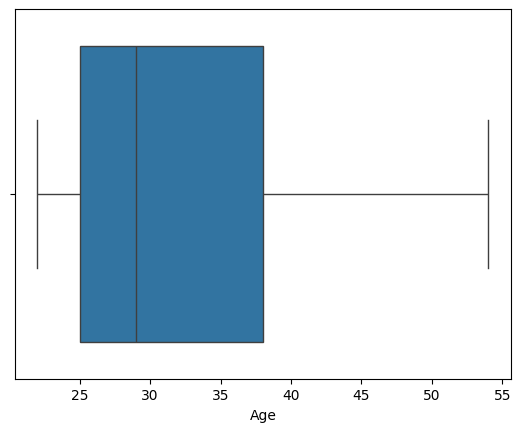

In [83]:
sns.boxplot(data = df, x = 'Age');


*   There are no outliers in the dataset.
*   The data shows a right-skewed distribution.
*   The median age is about 29 years and oldest customer is around 54 years old




Individual salary Analysis

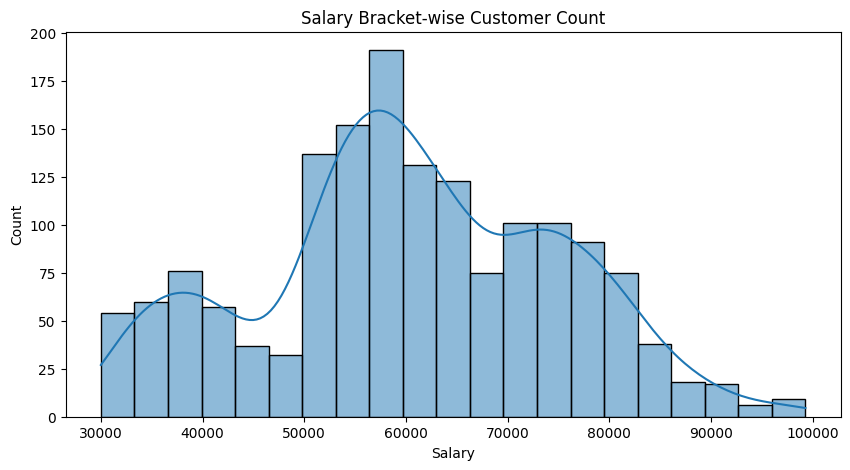

In [84]:
plt.figure(figsize=(10,5))
plt.title('Salary Bracket-wise Customer Count')
sns.histplot(data= df, x= "Salary", kde= True);

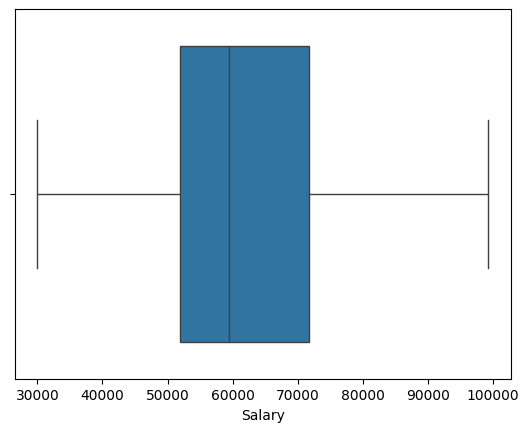

In [85]:
sns.boxplot(data = df, x = 'Salary');

Most customers earn between \$50,000 and \$70,000. Median salary is around \$60,000.
The peak salary group is around \$58,000 to \$60,000 — this range has the highest number of people.

The salary distribution is normal.The boxplot shows no outliers, so the salary data is clean and consistent.



Partner Salary Analysis

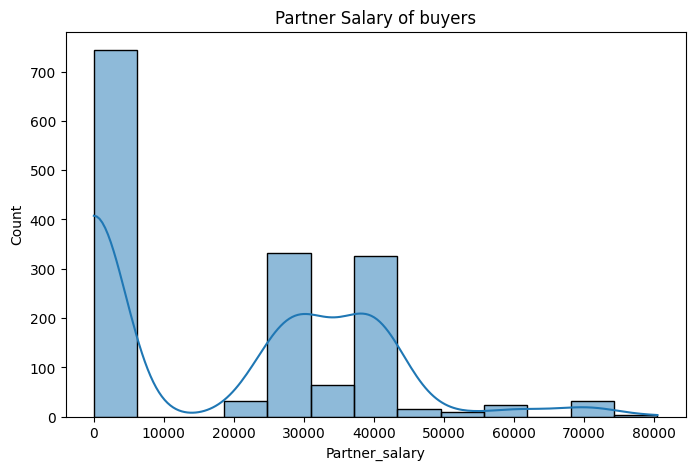

In [86]:
plt.figure(figsize=(8,5))
plt.title('Partner Salary of buyers')
sns.histplot(data= df, x= "Partner_salary", kde= True);

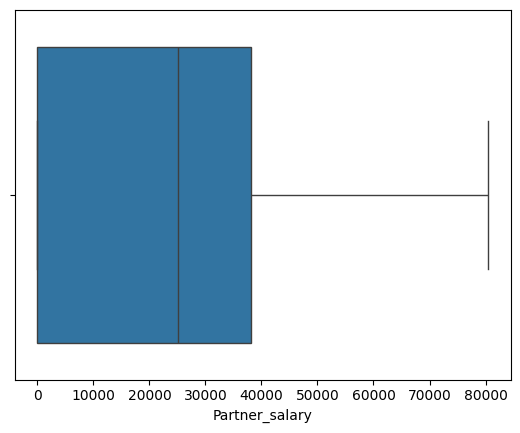

In [87]:
sns.boxplot(data = df, x = 'Partner_salary');

In [88]:
## let's try to understand the partner_salary more than 60000
df.loc[df['Partner_salary']>71000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,80100.000,170400,69000,SUV
56,51,Female,Salaried,Married,Post Graduate,2,No,No,Yes,90600,80400.000,171000,69000,SUV
116,47,Male,Business,Married,Graduate,4,Yes,No,Yes,86000,80500.000,166500,69000,SUV


*  Most partners have low or no income. very few partners have high salaries.
*  The distribution is right-skewed.
*   High partner salary is less common but impactful.

Total Salary Analysis

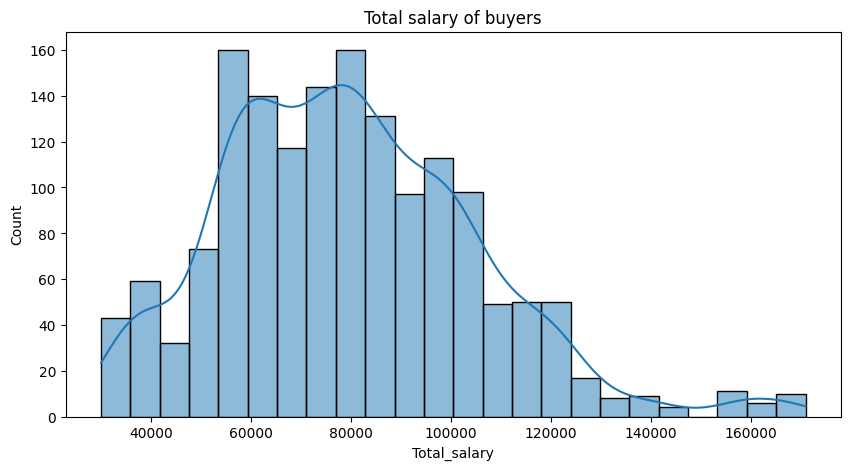

In [89]:
plt.figure(figsize=(10,5))
plt.title('Total salary of buyers')
sns.histplot(data= df, x= "Total_salary", kde= True);

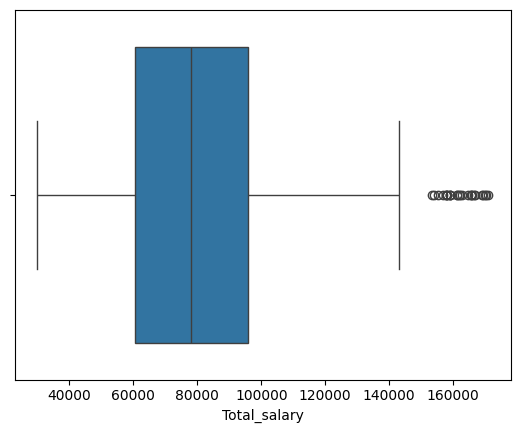

In [90]:
sns.boxplot(data = df, x = 'Total_salary');

Outliers present on Total_salary

In [91]:
df.loc[df['Total_salary']>145000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.000,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.000,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.000,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.000,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.000,165600,67000,SUV
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.000,161100,66000,SUV
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.000,166900,66000,SUV


In [92]:
df.loc[df['Total_salary']>145000].shape

(27, 14)

OBSERVATIONS:
Outliers in total salary are likely due to high individual and partner salaries, while most values remain within a normal range.

Car price analysis

<Axes: title={'center': 'Car price based purchase analysis'}, xlabel='Price', ylabel='Count'>

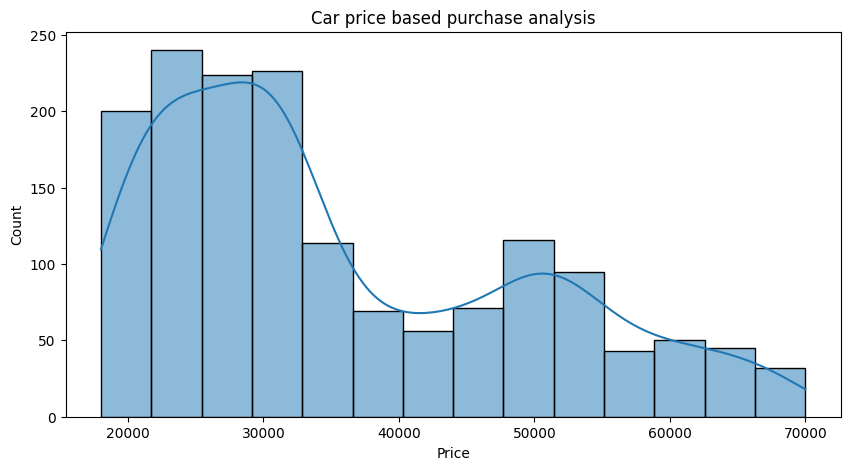

In [93]:
plt.figure(figsize=(10,5))
plt.title('Car price based purchase analysis')
sns.histplot(data= df, x= "Price", kde= True)

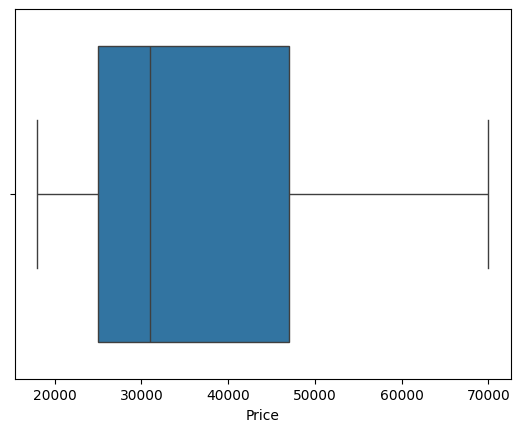

In [94]:
sns.boxplot(data = df, x = 'Price');

The price distribution is right-skewed

#Bivariate Analysis
let's understand how the numerical variables are associated with each other

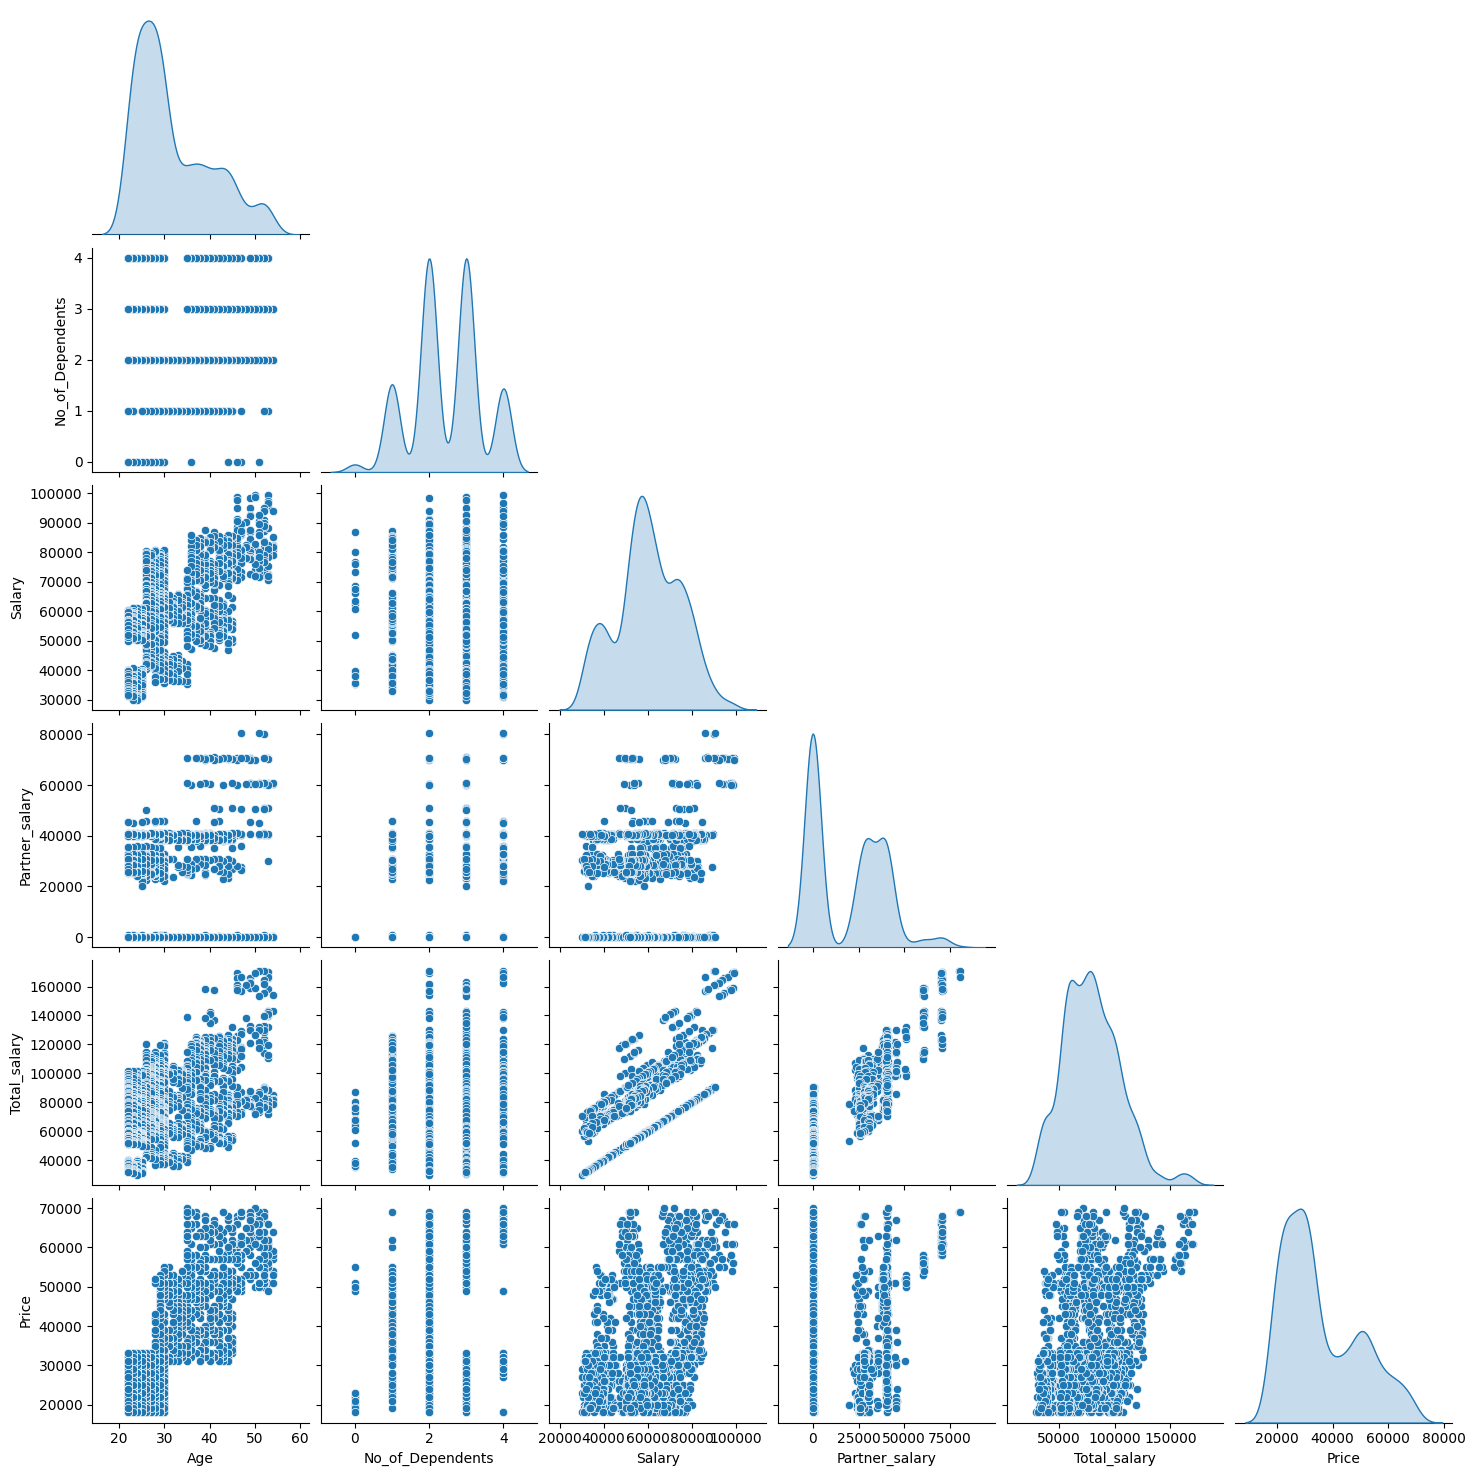

In [95]:
sns.pairplot(df, diag_kind="kde",corner=True);

Correlation Matrix

In [96]:
correlation = df.corr(numeric_only = True)
correlation

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000,-0.190,0.617,0.136,0.459,0.798
No_of_Dependents,-0.190,1.000,-0.032,0.144,0.093,-0.136
Salary,0.617,-0.032,1.000,0.087,0.642,0.410
Partner_salary,0.136,0.144,0.087,1.000,0.820,0.172
Total_salary,0.459,0.093,0.642,0.820,1.000,0.368
Price,0.798,-0.136,0.410,0.172,0.368,1.000


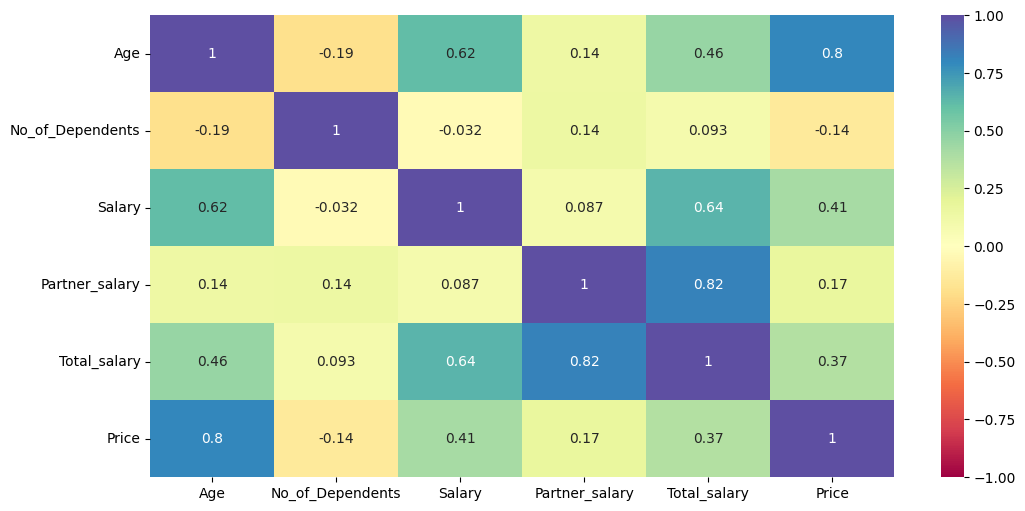

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only = True),
            annot=True, cmap='Spectral', vmin =-1, vmax=1)
# vmin corelation starts from this point ends at vmax
plt.show()

**OBSERVATIONS:**
*  Price shows a positive correlation with Age, Partner Salary, and Total Salary.
*   Individual Salary also has a strong link with Total Salary, but
Partner Salary seems to influence it more strongly.
*   There is a negative relationship between Age and Number of Dependents —
as age increases, the number of dependents tends to decrease.

 EDA-Car purchasing analysis

Gender based purchase decision

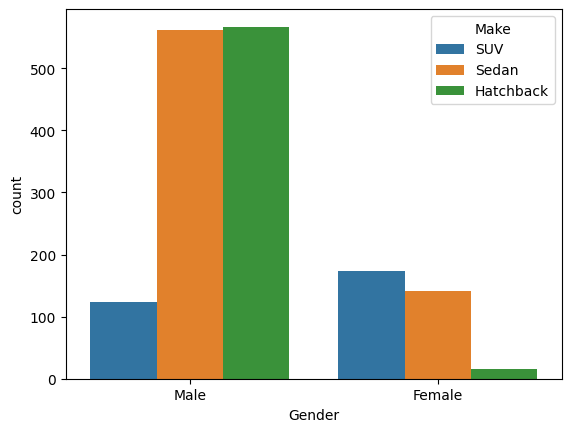

In [98]:
#Do men tend to prefer SUVs more compared to women?
sns.countplot(df,x='Gender',hue='Make');

**OBSERVATION:**
Male individuals generally exhibit a higher preference for hatchback cars, followed by sedans, while female individuals tend to favor SUVs, followed by sedans.

Profession Based car purchase decision

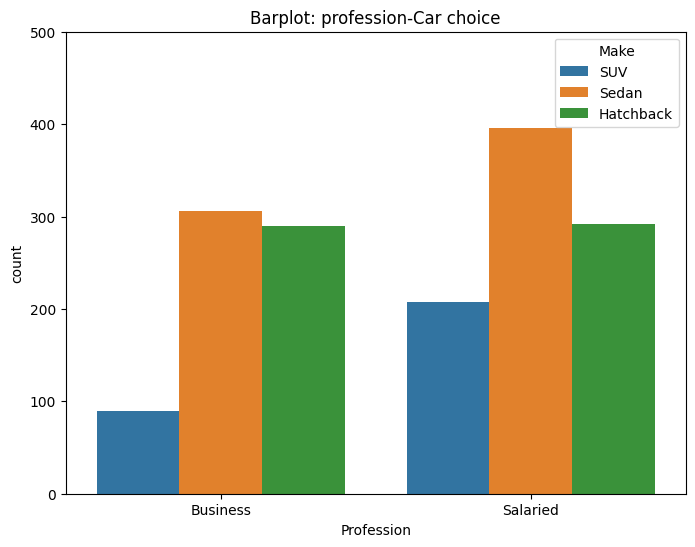

In [99]:
plt.figure(figsize=(8,6))
plt.title('Barplot: profession-Car choice')
plt.ylim(0,500)
ax=sns.countplot(df,x='Profession',hue='Make');

In [100]:
# counting the total number of salaried individuals who bought a sedan
salaried_sedan_counts= df[(df['Profession']=='Salaried') & (df['Make']=='Sedan')].shape[0]

# total salaried individuals
Total_salaried_counts= df[df['Profession']=='Salaried'].shape[0]

# calculating likelyhood
likelihood=(salaried_sedan_counts/Total_salaried_counts)*100
print('Likelihood of a salaried individual buying a Sedan: ', likelihood ,'%')

Likelihood of a salaried individual buying a Sedan:  44.19642857142857 %


 Profession-Gender based purchase analysis

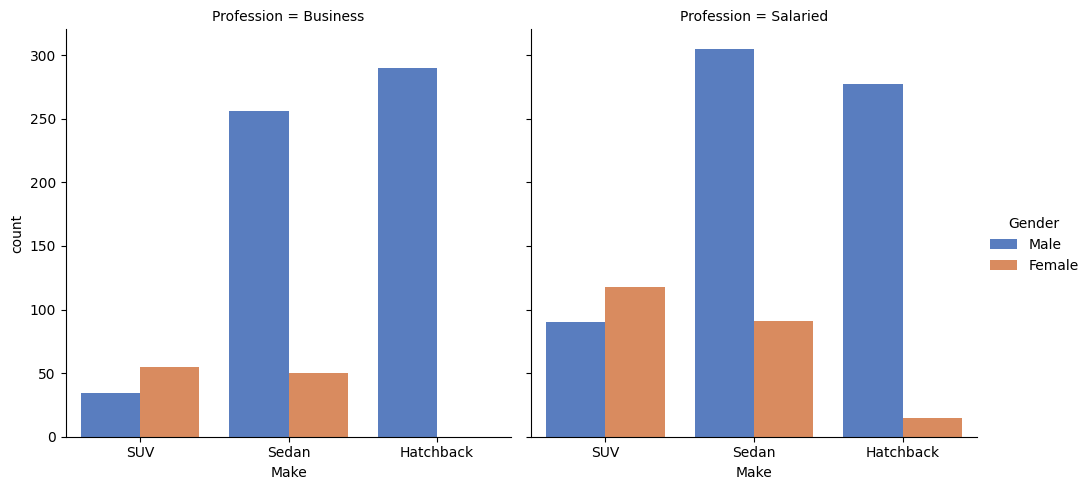

In [101]:
## What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
sns.catplot(df,col='Profession',x='Make',hue='Gender',kind='count',palette='muted');

OBSERVATION: Salaried male individuals tend to prefer Sedans over SUVs when purchasing a car.

Gender-Price Analysis

In [102]:
## use goupby for gender and mean of price
df.groupby('Gender')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.000,47705.167,11244.836,20000.000,38000.000,49000.000,55000.000,69000.000
Male,1252.000,32416.134,12366.253,18000.000,23000.000,29000.000,37000.000,70000.000


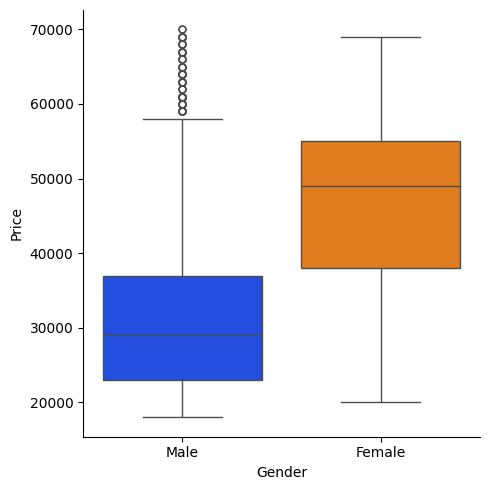

In [103]:
sns.catplot(data=df, x="Gender", y="Price", hue="Gender", kind='box', palette='bright');

OBSERVATION:

*   Females tend to spend more on cars compared to males.
*   About 75% of male purchases are below \$37,000, while 75% of female purchases are \$38,000 and above.
*   Outliers are seen in male spending, showing a few spend much more.

 Purchase analysis based on car model price  

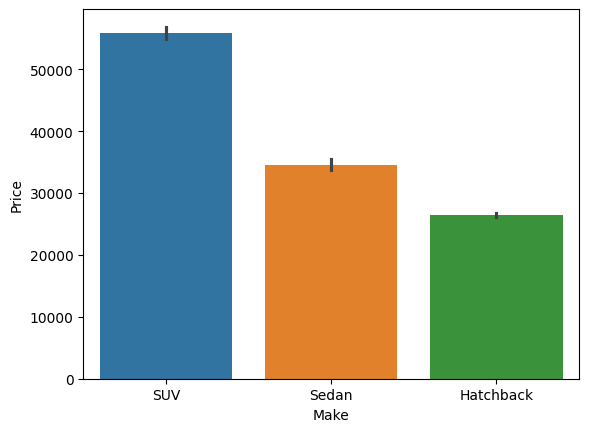

In [104]:
# lets check the price structure for different types of Make

sns.barplot(df,x='Make',y='Price',hue='Make');

SUVs and Sedans are generally priced higher than Hatchbacks.

Purchasing pattern for female with respect to model  

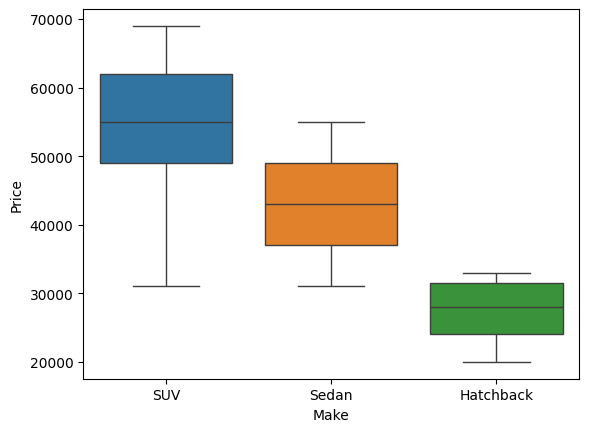

In [105]:
## Let's create a data frame for Female
df_womens = df.loc[df['Gender']=='Female']

## let's try to analyze the price structure where Females are focusing
sns.boxplot(data=df_womens, x='Make',y='Price',hue='Make');

In [106]:
df_womens.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,15.000,27466.667,4240.395,20000.000,24000.000,28000.000,31500.000,33000.000
SUV,173.000,53479.769,10378.079,31000.000,49000.000,55000.000,62000.000,69000.000
Sedan,141.000,42773.050,7248.023,31000.000,37000.000,43000.000,49000.000,55000.000



*   Female buyers show a strong preference for SUVs, which are costlier.
*   They also lean toward Sedans especially higher-priced variants, showing a trend of spending more per vehicle.



 Purchasing pattern for male with respect to model

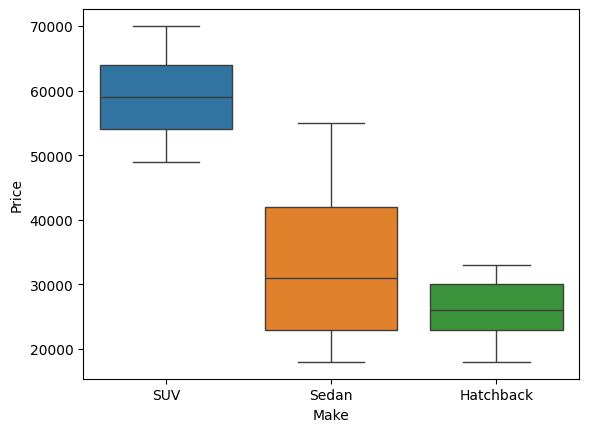

In [107]:
#Let's try to understand the male pattern
df_males = df.loc[df['Gender']=='Male']
sns.boxplot(data=df_males, x='Make',y='Price',hue='Make');

In [108]:
df_males.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,567.000,26447.972,4292.366,18000.000,23000.000,26000.000,30000.000,33000.000
SUV,124.000,59096.774,5946.126,49000.000,54000.000,59000.000,64000.000,70000.000
Sedan,561.000,32550.802,11023.903,18000.000,23000.000,31000.000,42000.000,55000.000




*    Male buyers mostly prefer Hatchbacks, followed closely by Sedans. but they generally pick lower-priced Sedan models.  
*   Few male buyers go for SUVs, and even when they do, it’s less frequent, though the high SUV prices cause outliers in their purchase data.



 Impact of Financial Loans on Vehicle Purchase Decisions

In [109]:
## How much money was spent on purchasing automobiles by individuals who took a personal loan?
df.groupby('Personal_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.000,36742.712,14534.345,18000.000,25000.000,32000.000,49000.000,70000.000
Yes,792.000,34457.071,12578.780,18000.000,24000.000,31000.000,45000.000,70000.000


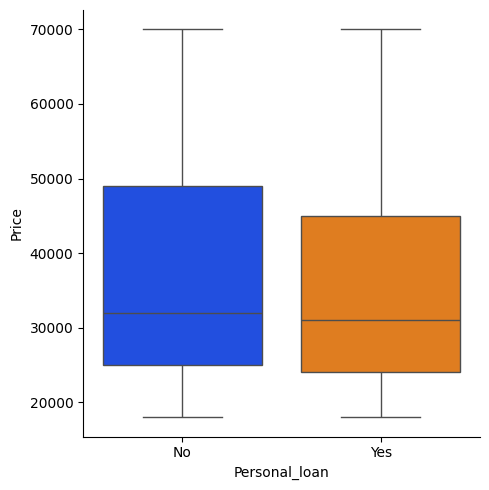

In [110]:
sns.catplot(data=df, x="Personal_loan", y="Price", hue="Personal_loan", kind='box', palette='bright');

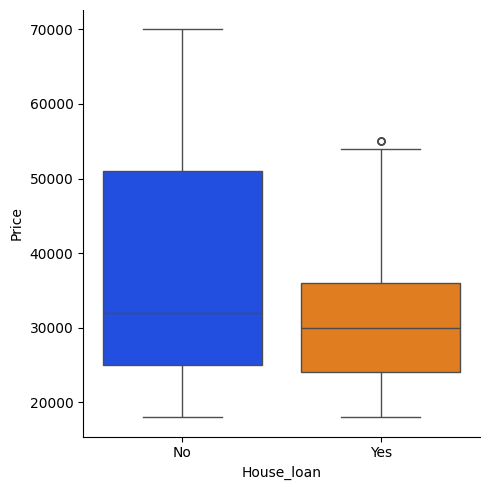

In [111]:
sns.catplot(data=df, x="House_loan", y="Price", hue="House_loan", kind='box', palette='bright');

In [112]:
df.groupby('House_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
House_loan,,,,,,,,
No,1054.000,37707.780,14816.702,18000.000,25000.000,32000.000,51000.000,70000.000
Yes,527.000,31377.609,9596.008,18000.000,24000.000,30000.000,36000.000,55000.000


**OBSERVATIONS:**
*  Personal Loans Have Limited Impact: People who have personal loans don’t seem to spend much differently on cars. Nearly 75% of them buy vehicles priced under \$45,000, and the usual spending range stays around \$31,000 to \$32,000, which is pretty close to those who don’t have personal loans.

*   House Loans Influence Car Buying Decisions: On the other hand, home loans seem to affect how much people spend. About 75% of buyers with home loans go for cars under \$36,000, and the average spending drops to around \$31,377.61, which is clearly lower than those without home loans.
* Why It Matters: This shows that having a house loan might limit how much someone is willing or able to spend on a car, pushing them towards more budget-friendly options.


Partner Working analysis on car purchase

In [113]:
# How does having a working partner influence the purchase of higher-priced cars?
df.groupby('Partner_working')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.000,36000.000,13817.734,18000.000,25000.000,31000.000,48000.000,70000.000
Yes,868.000,35267.281,13479.533,18000.000,24000.000,31000.000,46000.000,70000.000


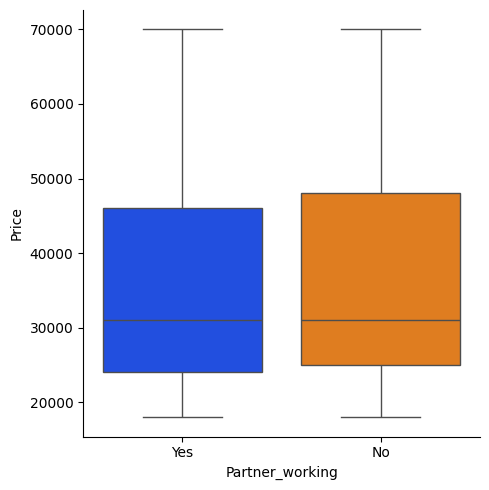

In [114]:
sns.catplot(data=df, x="Partner_working", y="Price", hue="Partner_working", kind='box', palette='bright');

Actionable Insights
1.	Car Preferences Vary by Gender: Male customers mostly prefer Hatchbacks, followed by Sedans. Female customers strongly prefer SUVs, then Sedans.
2.	Females spend more on average than males mainly due to their preference for higher-priced SUVs and Sedans.
3.	Model and Price Relation: SUVs and Sedans are priced higher than Hatchbacks. These two models contribute more to total revenue.
4.	Profession-Based Buying Pattern: Salaried individuals have a 44.2% chance of buying Sedans. Business individuals also prefer Sedans, followed by Hatchbacks.
5.	Age vs. Spending: As age increases, spending also increases. Older customers are more likely to go for higher-priced cars.
6.	Loan Impact on Spending: Personal loans don’t make much difference — buyers still spend around \$31,000 to \$32,000. House loan holders mostly buy cars under \$36,000. Their average spend drops to \$31,377.61.
7.	Partner Working Status: Whether the partner is working or not doesn’t affect purchase decisions much. Spending patterns are similar in both cases.


Business Recommendations:  

1. Segment-Based Marketing Campaigns
Develop distinct marketing content for male and female customers:
Men-focused ads: Emphasize fuel efficiency, sporty design, and tech features in Hatchbacks and Sedans. Use direct, performance-driven messaging.
Women-focused ads: Highlight safety, spacious interiors, and premium comfort in SUVs and Sedans. Use lifestyle-based messaging to match their purchase behavior.
2. Expand the Sedan Lineup
Sedans are the most commonly chosen model across both salaried and business segments.
Introduce new Sedan variants with flexible pricing tiers.
Focus on modern styling, comfort, and mileage, which are common decision factors.
3. Gender-Based Offers to Boost Conversion
Female customers spend more on average.
Design exclusive offers or festive discounts for women buyers.
Bundle perks like priority delivery, free insurance, or accessories to increase value.
4. Age-Specific Luxury Marketing
As age rises, so does average spending.
Launch luxury upgrade programs targeting 35+ age groups.
Campaigns should showcase elegance, status, and long-term value of premium models.
5. Loan-Friendly Promotions
Spending patterns shift slightly based on loan types:
For house loan holders, introduce low-down-payment and EMI holiday schemes.
For general loan holders, offer finance bundles tied to mid-range models to improve affordability.
No special offers needed for personal loan customers, as their spending is normal.
6. Couple & Family-Centric Campaigns
No major difference based on partner’s work status, but:
Create packages like "Family First Offers" with add-ons (e.g., kids’ safety seats, extended warranty).
Target households as a unit, focusing on joint decision-making.
7. Leverage SUV Preferences Among Women
Since women lean toward SUVs:
Identify top-rated SUV features (like height, boot space, safety tech).
Highlight these aspects in female-centric promotions – both online and in showroom banners.
8. Boost Online Visibility & Offers
Use the company website to market car models aligned with buyer preferences.
Introduce online-only discounts, exchange offers, and real-time availability to attract digital-first customers
